# Classification using Bayesian Decision Theory - Overview

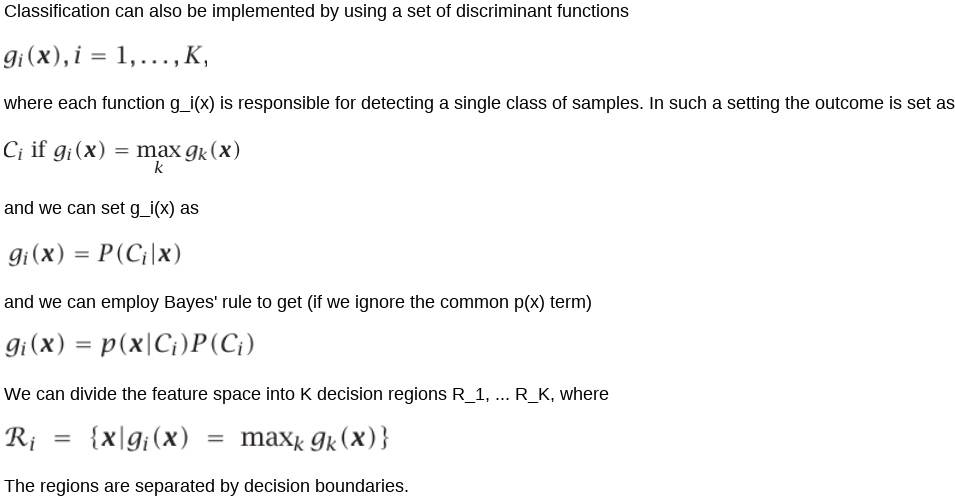

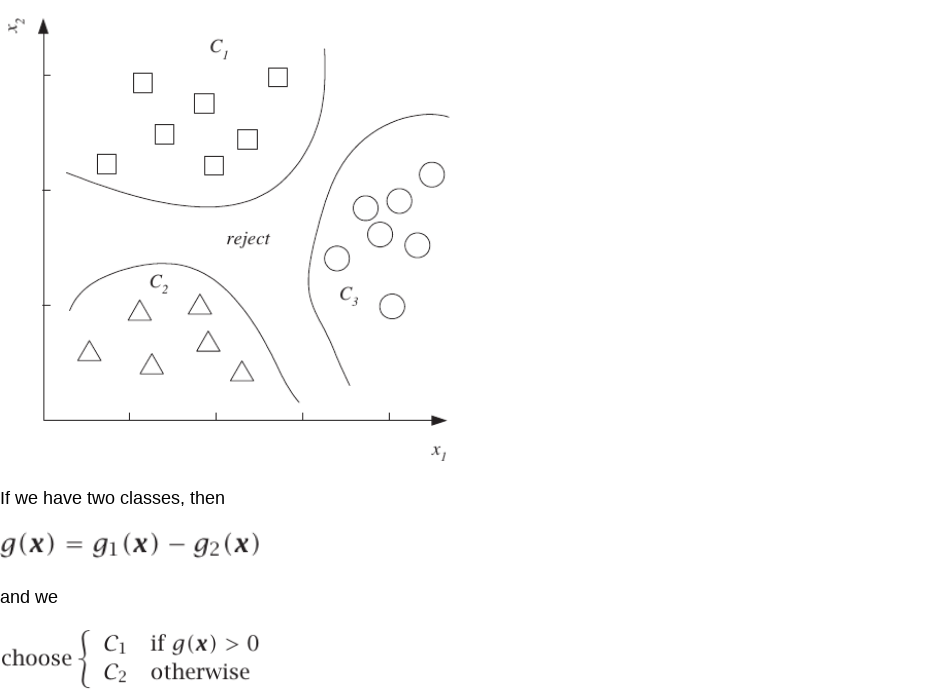

Lets generate a toy classification problem dataset for the cartesian coordinate system with two classes (K=2).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import sys
np.random.seed(0)
random.seed(0)

a. Pick Centers

In [2]:
center1_x = 8
center1_y = 11

center2_x = 8
center2_y = 12

Place centers into a dictionary for later

In [3]:
centers_dict = {}
centers_dict[(center1_x,center1_y)] = "class1"
centers_dict[(center2_x,center2_y)] = "class2"
centers_dict

{(8, 11): 'class1', (8, 12): 'class2'}

b. Generate 20 data points as noise around each center

In [4]:
sample_x_1 = np.random.uniform(center1_x-1, center1_x+1, 20)
sample_x_2 = np.random.uniform(center2_x-1, center2_x+1, 20)

sample_y_1 = np.random.uniform(center1_y-1, center1_y+1, 20)
sample_y_2 = np.random.uniform(center2_y-1, center2_y+1, 20)

c. Place dataset with ground truth 

In [5]:
data_dict = {}

for i in range(0,20):
    new_tuple = (sample_x_1[i],sample_y_1[i])
    data_dict[new_tuple] = "class1"
    
for i in range(0,20):
    new_tuple = (sample_x_2[i],sample_y_2[i])
    data_dict[new_tuple] = "class2"
data_dict

{(8.09762700785465, 10.719015801147572): 'class1',
 (8.430378732744838, 10.874063907598682): 'class1',
 (8.205526752143287, 11.39526239185453): 'class1',
 (8.089766365993794, 10.12045094325854): 'class1',
 (7.84730959867781, 11.333533430891336): 'class1',
 (8.291788226133312, 11.34127573923632): 'class1',
 (7.875174422525385, 10.420765122147682): 'class1',
 (8.78354600156416, 10.257852595309707): 'class1',
 (8.927325521002059, 10.630856701848368): 'class1',
 (7.766883037651556, 10.727421541885246): 'class1',
 (8.58345007616533, 11.14039354083576): 'class1',
 (8.057789839505809, 10.87720302692464): 'class1',
 (8.136089122187865, 11.976747676118453): 'class1',
 (8.851193276585322, 10.204089621496056): 'class1',
 (7.142072116395774, 10.41775351218967): 'class1',
 (7.174258599403082, 10.322619035769993): 'class1',
 (7.040436794880652, 11.306216650930796): 'class1',
 (8.665239691095875, 10.506583205079565): 'class1',
 (8.556313501899702, 10.932621545712612): 'class1',
 (8.740024296493639, 1

d. shuffle the data points 

In [6]:
datapoints =  list(data_dict.keys())      # for Python 2 use keys = d.keys()
random.shuffle(datapoints)

Assuming P(C_i | x) is correlated with Euclidean distance between the class center and data point. Calculate prediction g(x) for each data point. Report correct classification and misclassification counts.

a. define euclidean distance measure and predict for all data points 

In [7]:
def euclidean_distance(q1,p1,q2,p2):
    first_term = (q1-p1)*(q1-p1)
    second_term = (q2-p2)*(q2-p2)
    result = math.sqrt(first_term+second_term)
    return result

In [8]:
def predict_class(centers, datapoint):
    current_class = "unknown"
    current_distance = sys.maxsize
    for key,val in centers.items():
        distance = euclidean_distance(key[0],datapoint[0],key[1],datapoint[1])
        if distance < current_distance:
            current_distance = distance
            current_class = val
    return current_class

In [9]:
result_dict = {}
for i in datapoints:
    result_dict[i] = predict_class(centers_dict,i)

b. Report on correct and incorrect classifications 

In [10]:
correct_count = 0
for i in result_dict:
    if result_dict[i] == data_dict[i]:
        correct_count += 1
correct_count

30

Plot dataset along with predictions.

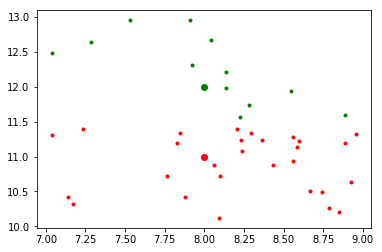

In [11]:
plt.subplots()
#plt.axis([0, 10, 0, 15])
plt.plot(center1_x, center1_y, 'ro')
plt.plot(center2_x, center2_y, 'go')

for key,val in result_dict.items():
    if val == "class1":
        plt.plot(key[0], key[1], 'r.')
    else:
        plt.plot(key[0], key[1], 'g.')